In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [25]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A=np.ones(nA)*epsilon/(nA-1)
        best_action=np.argmax(Q[observation])
        A[best_action]=(1-epsilon)
        #print(np.sum(A))
        return A
    return policy_fn

In [30]:
def mc_control_epsilon_greedy(env, num_episodes, discount_factor=1.0, epsilon=0.1):
    """
    Monte Carlo Control using Epsilon-Greedy policies.
    Finds an optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, policy).
        Q is a dictionary mapping state -> action values.
        policy is a function that takes an observation as an argument and returns
        action probabilities
    """
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    # Run this many episodes
    for i_episode in range(1, num_episodes + 1):
        
        #print episode num
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes))
            sys.stdout.flush()
        
        #run this episode
        episode=[]
        state=env.reset()
        for t in range(100):
            
            probs = policy(state)
            action = np.random.choice(np.arange(env.action_space.n), p=probs)
            next_state, reward, done, info=env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state=next_state
        
        for x in episode:
            state=x[0]
            action=x[1]
            sa_pair=(state, action)
            #get G
            G=0
            first=True
            for i in range(len(episode)):
                if state==episode[i][0] and action==episode[i][1] and first:
                    first=False
                    first_idx=i
                if not first:
                    n=i-first_idx
                    reward=episode[i][2]
                    G+=reward*(discount_factor**n)
            returns_sum[sa_pair]+=G
            returns_count[sa_pair]+=1
            Q[state][action]=returns_sum[sa_pair]/returns_count[sa_pair]
        
#         for x in episode:
#             state=x[0]
#             policy[state]=np.argmax(Q[state])
    
    return Q, policy

In [31]:
Q, policy = mc_control_epsilon_greedy(env, num_episodes=500000, epsilon=0.1)

Episode 1000/500000.
Episode 2000/500000.
Episode 3000/500000.
Episode 4000/500000.
Episode 5000/500000.
Episode 6000/500000.
Episode 7000/500000.
Episode 8000/500000.
Episode 9000/500000.
Episode 10000/500000.
Episode 11000/500000.
Episode 12000/500000.
Episode 13000/500000.
Episode 14000/500000.
Episode 15000/500000.
Episode 16000/500000.
Episode 17000/500000.
Episode 18000/500000.
Episode 19000/500000.
Episode 20000/500000.
Episode 21000/500000.
Episode 22000/500000.
Episode 23000/500000.
Episode 24000/500000.
Episode 25000/500000.
Episode 26000/500000.
Episode 27000/500000.
Episode 28000/500000.
Episode 29000/500000.
Episode 30000/500000.
Episode 31000/500000.
Episode 32000/500000.
Episode 33000/500000.
Episode 34000/500000.
Episode 35000/500000.
Episode 36000/500000.
Episode 37000/500000.
Episode 38000/500000.
Episode 39000/500000.
Episode 40000/500000.
Episode 41000/500000.
Episode 42000/500000.
Episode 43000/500000.
Episode 44000/500000.
Episode 45000/500000.
Episode 46000/50000

Episode 362000/500000.
Episode 363000/500000.
Episode 364000/500000.
Episode 365000/500000.
Episode 366000/500000.
Episode 367000/500000.
Episode 368000/500000.
Episode 369000/500000.
Episode 370000/500000.
Episode 371000/500000.
Episode 372000/500000.
Episode 373000/500000.
Episode 374000/500000.
Episode 375000/500000.
Episode 376000/500000.
Episode 377000/500000.
Episode 378000/500000.
Episode 379000/500000.
Episode 380000/500000.
Episode 381000/500000.
Episode 382000/500000.
Episode 383000/500000.
Episode 384000/500000.
Episode 385000/500000.
Episode 386000/500000.
Episode 387000/500000.
Episode 388000/500000.
Episode 389000/500000.
Episode 390000/500000.
Episode 391000/500000.
Episode 392000/500000.
Episode 393000/500000.
Episode 394000/500000.
Episode 395000/500000.
Episode 396000/500000.
Episode 397000/500000.
Episode 398000/500000.
Episode 399000/500000.
Episode 400000/500000.
Episode 401000/500000.
Episode 402000/500000.
Episode 403000/500000.
Episode 404000/500000.
Episode 405

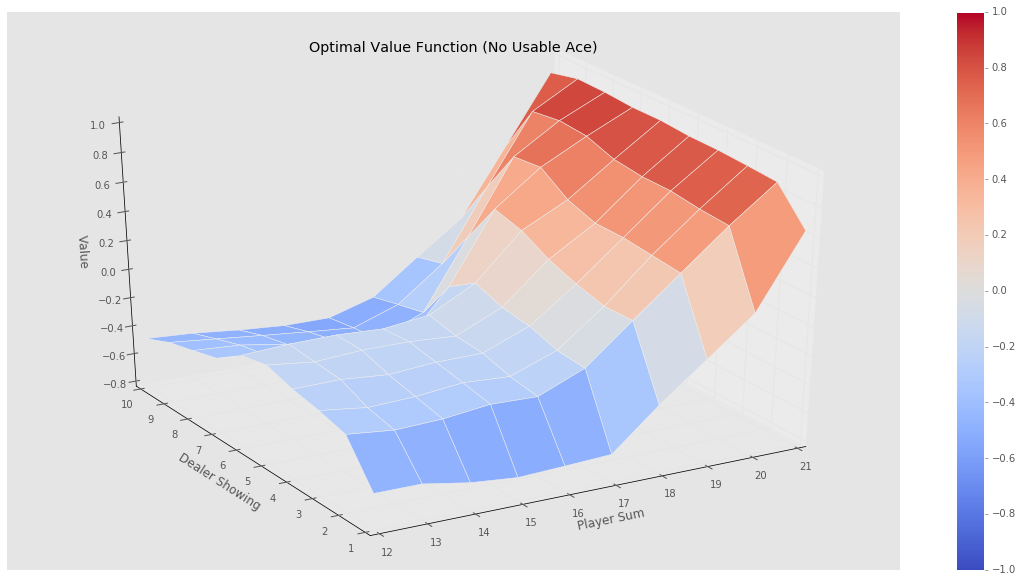

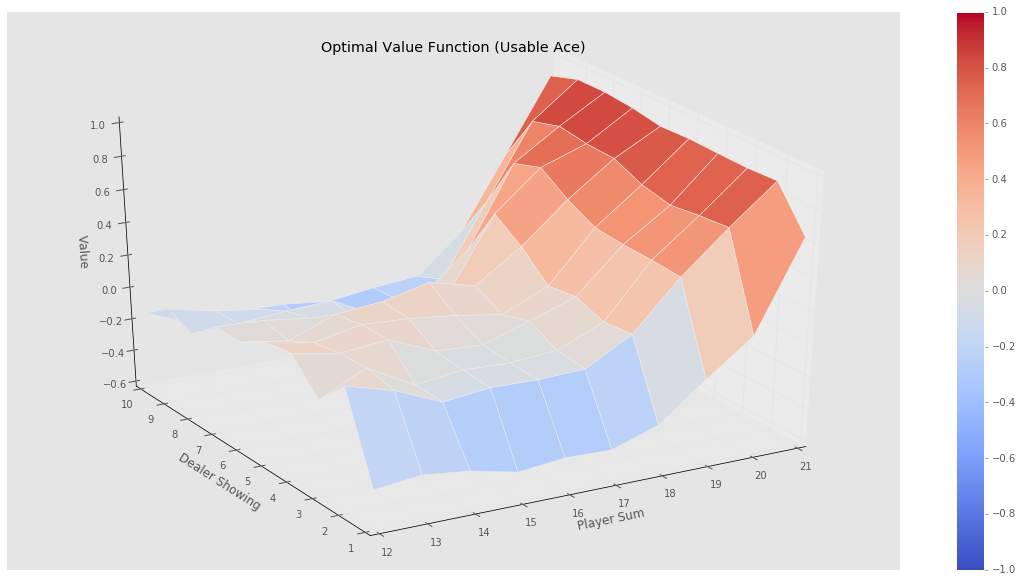

In [32]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")